In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv('US_Accidents_March23.csv')  # Assuming you've downloaded the dataset

# Preview the data
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [24]:
# Check the column names of the dataset
df.columns


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

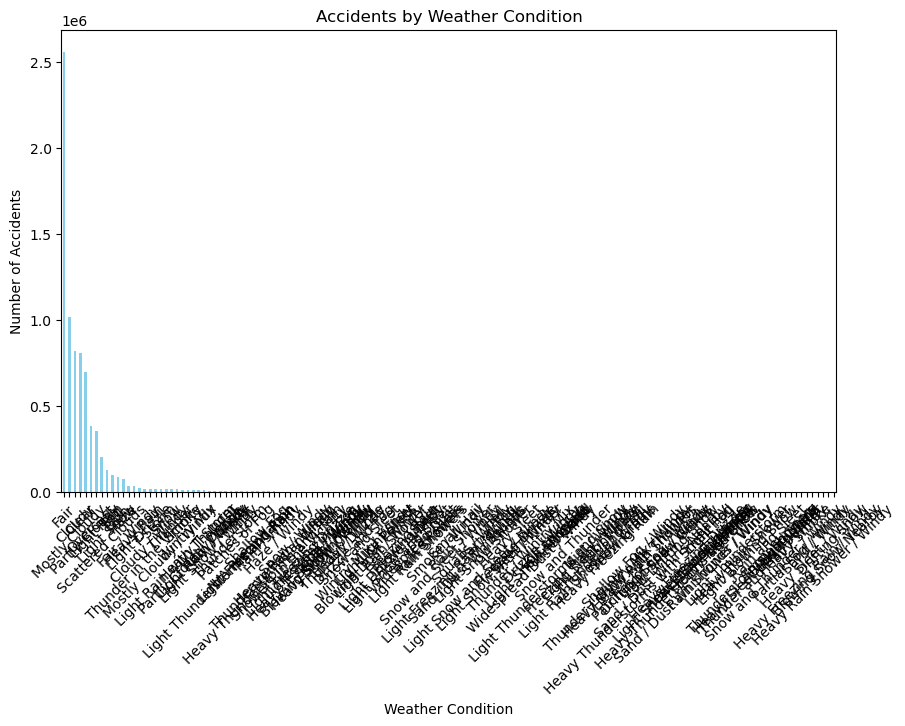

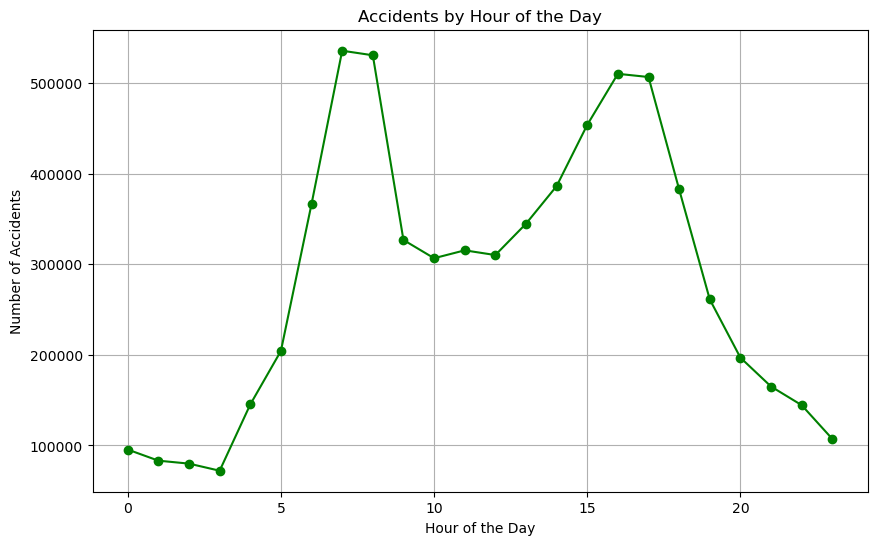

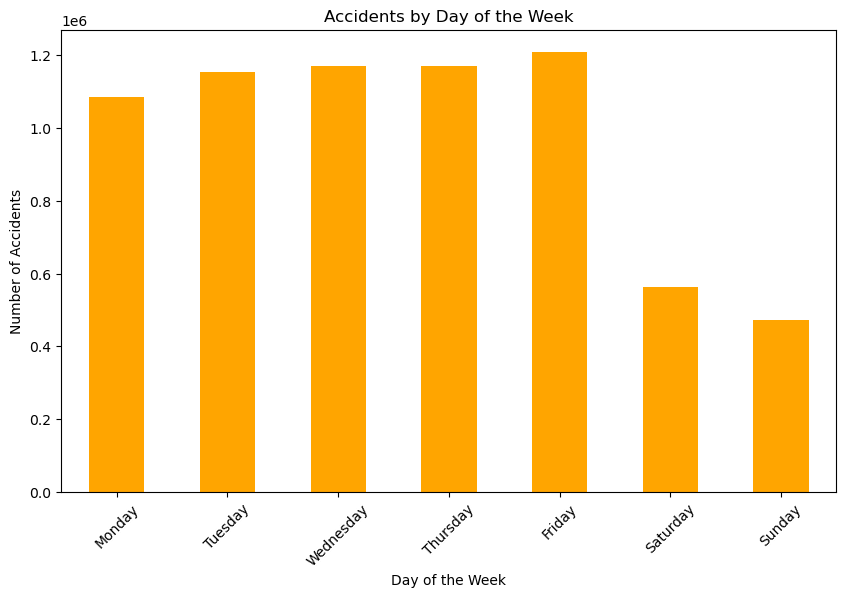

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap



# Convert 'Start_Time' to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Feature Engineering: Extract hour, day, and month from 'Start_Time'
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['Month'] = df['Start_Time'].dt.month

# Handle missing values (drop rows with missing critical columns)
df.dropna(subset=['Start_Lat', 'Start_Lng', 'Weather_Condition'], inplace=True)

# 1. Weather Condition Analysis

# Count accidents by weather condition
weather_counts = df['Weather_Condition'].value_counts()

# Plot weather conditions contributing to accidents
plt.figure(figsize=(10,6))
weather_counts.plot(kind='bar', color='skyblue')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 2. Time of Day Analysis (Accidents by Hour of the Day)
hourly_accidents = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,6))
hourly_accidents.plot(kind='line', marker='o', color='green')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# 3. Day of Week Analysis
weekday_accidents = df['DayOfWeek'].value_counts().sort_index()

# Map days of the week to names
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_accidents.index = days_of_week

plt.figure(figsize=(10,6))
weekday_accidents.plot(kind='bar', color='orange')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 4. Accident Hotspot Visualization on Map (using Lat/Lng)
# Creating a Folium map centered around the average accident coordinates
m = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=6)

# Add HeatMap to visualize accident hotspots
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file for visualization
m.save('accident_hotspots_map.html')

# 5. Severity by Weather Condition
severity_weather = df.groupby('Weather_Condition')['Severity'].value_counts().unstack().fillna(0)

# Plot the severity distribution by weather condition
severity_weather.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'yellow', 'green', 'blue'])
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 6. Correlation Heatmap (Accident Severity and Contributing Factors)
df['Weather_Condition'] = df['Weather_Condition'].astype('category').cat.codes  # Convert categorical to numerical
df['Hour'] = df['Hour'].astype('category').cat.codes  # Convert hour to numerical
df['DayOfWeek'] = df['DayOfWeek'].astype('category').cat.codes  # Convert day of week to numerical

# Create a correlation matrix
corr_matrix = df[['Severity', 'Weather_Condition', 'Hour', 'DayOfWeek', 'Temperature(F)', 'Wind_Speed(mph)', 'Precipitation(in)']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Accident Severity and Contributing Factors')
plt.show()